In [3]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Set pandas display option to show all columns
pd.set_option('display.max_columns', None)

In [4]:
df=pd.read_csv("ThyroidData.csv")
df.sample(5)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,Classes
1382,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.00,t,1.0,t,61.0,t,0.77,t,80.0,Negative
2930,43,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.01,f,0.0,t,171.0,t,0.98,t,174.0,Negative
1256,24,F,f,f,f,f,f,f,f,f,f,f,f,f,f,t,t,1.70,t,2.4,t,126.0,t,0.92,t,136.0,Negative
2518,67,F,f,f,f,f,f,f,f,f,t,f,f,t,f,f,t,0.07,t,1.7,t,132.0,t,1.02,t,130.0,Negative
1454,39,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.20,t,0.3,t,73.0,t,0.78,t,94.0,Negative


In [5]:
# all the columns of the dataset
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'Classes'],
      dtype='object')

In [6]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000,3771.000000
mean,51.629011,4.590073,1.602901,101.681464,0.892852,99.192973
std,18.980473,23.342865,1.097044,43.187387,0.354230,45.852420
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.200000,0.900000,84.000000,0.840000,86.500000
50%,54.000000,1.200000,1.800000,102.000000,0.950000,104.000000
75%,67.000000,2.450000,2.200000,123.000000,1.070000,121.500000
max,94.000000,530.000000,10.600000,430.000000,2.320000,395.000000


# Univariate Analysis
Univariate Analysis is a type of statistical analysis that involves the examination of a single variable (hence "uni-variate"). Its primary objective is to describe and summarize the main characteristics of that one variable.

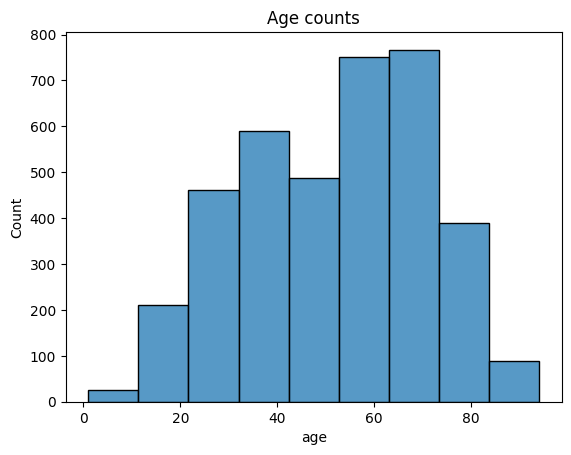

In [7]:
# Age
plt.title("Age counts")
sns.histplot(df,x=df.age,bins=10,binwidth=10)
plt.show()

In [19]:
# category wise counts
def pie_chart(column_name:str):
    data_counts=df[f'{column_name}'].value_counts()
    # Plot pie chart
    plt.figure(figsize=(6,6))
    plt.pie(
        data_counts, 
        labels=data_counts.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=['#66b3ff','#ff9999']
    )
    plt.title(f'{column_name} distribution')

    plt.show()

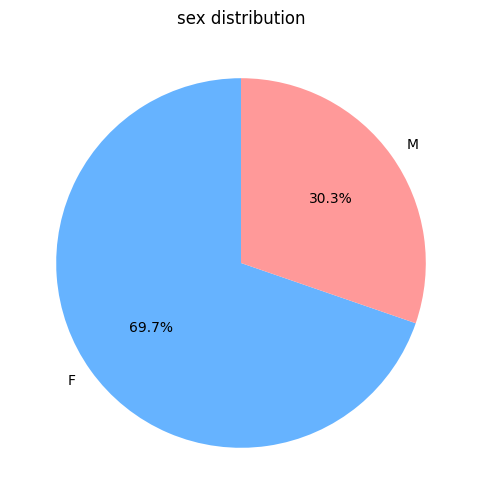

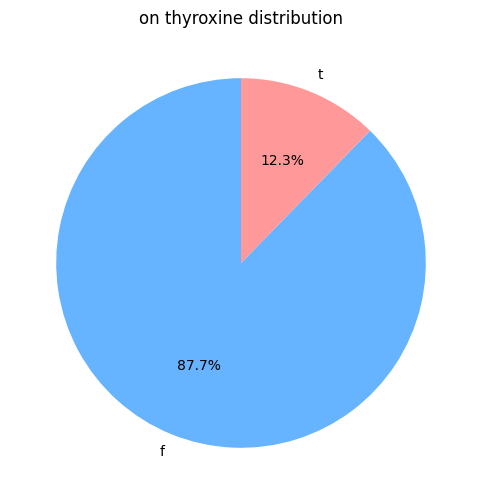

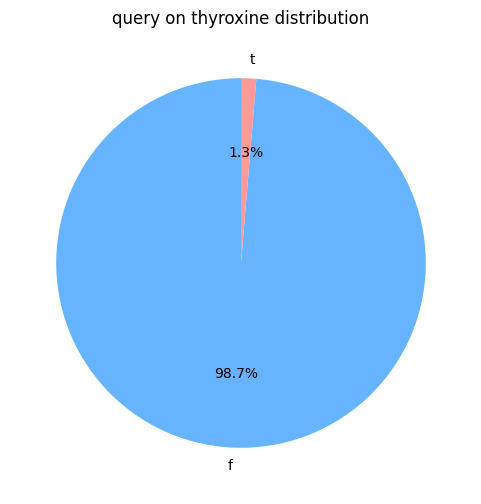

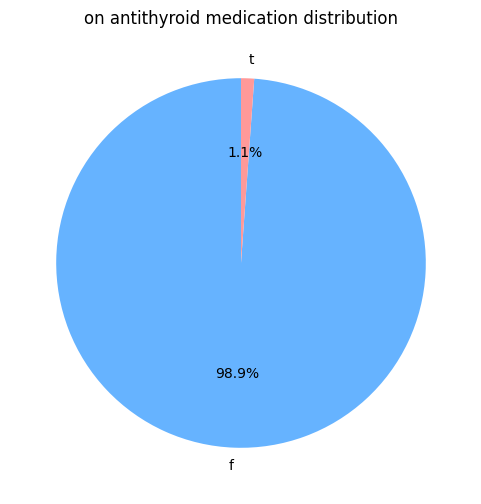

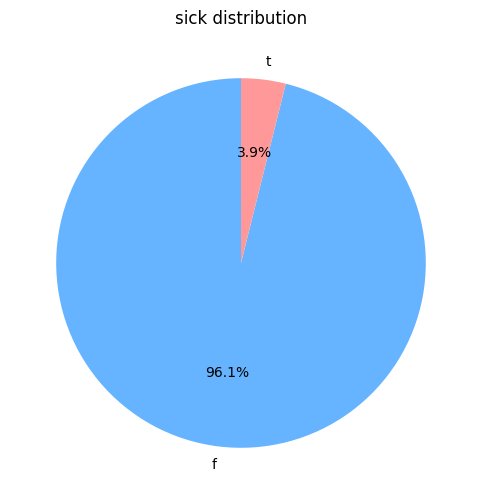

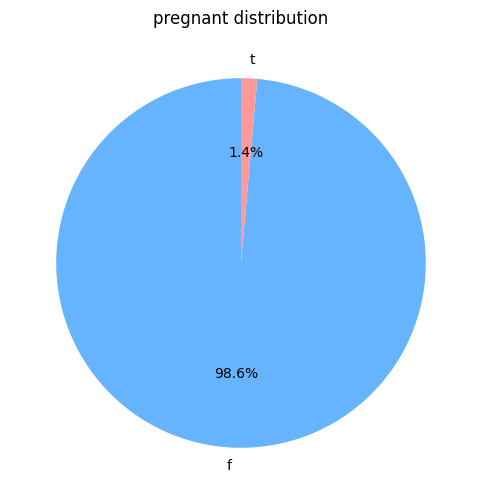

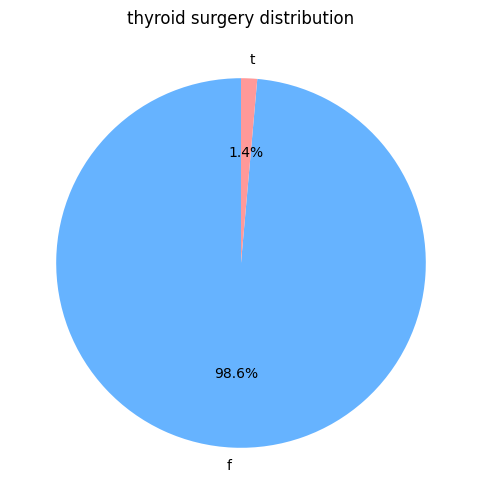

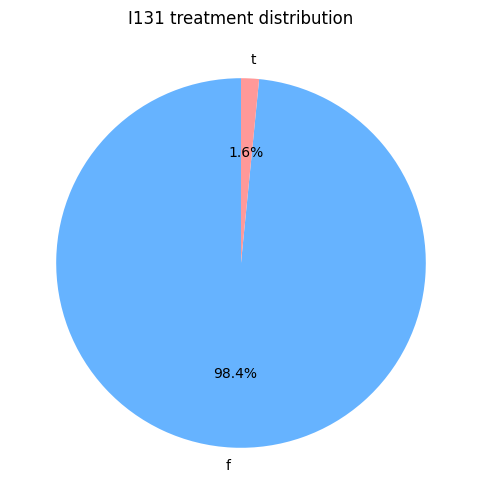

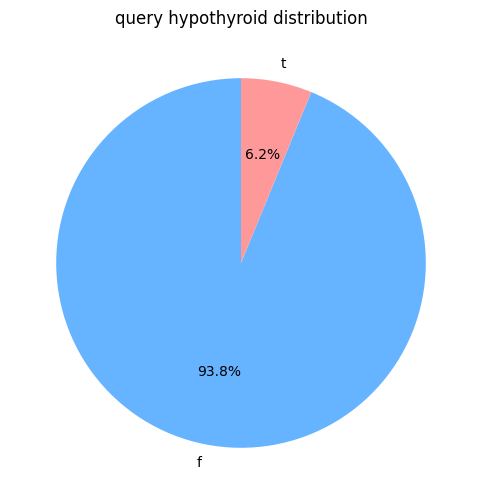

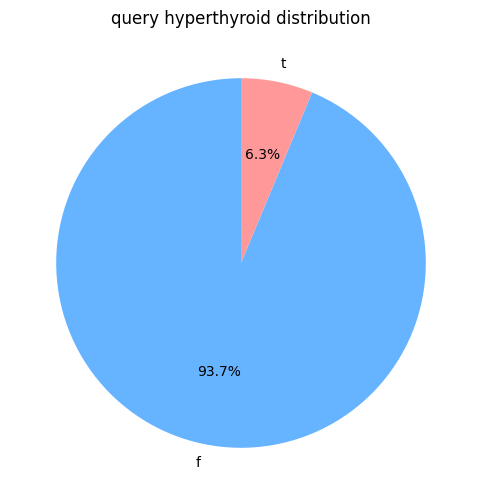

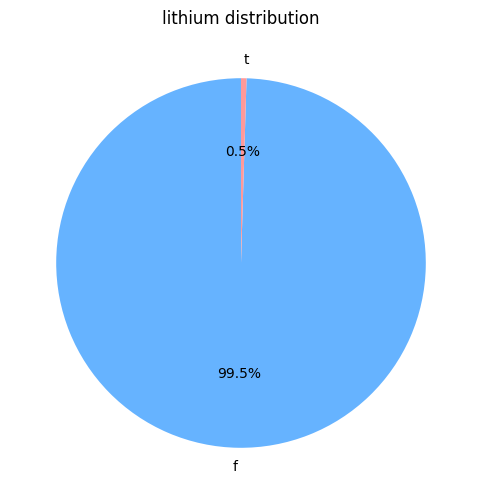

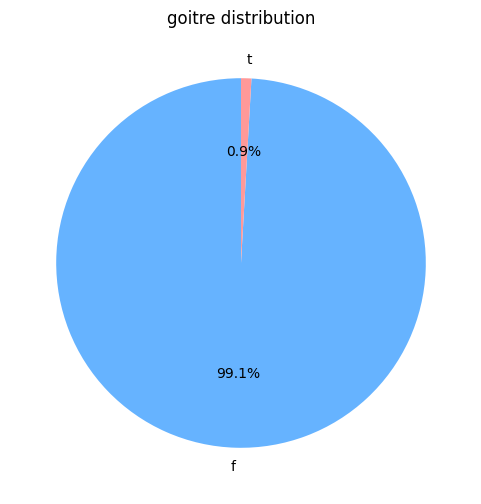

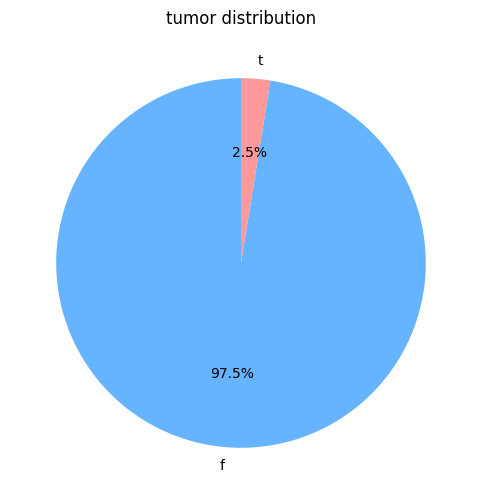

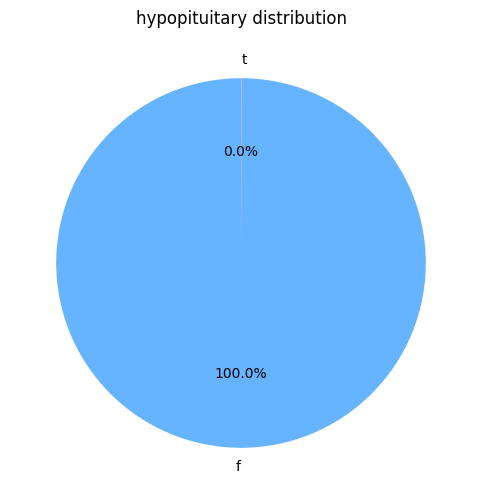

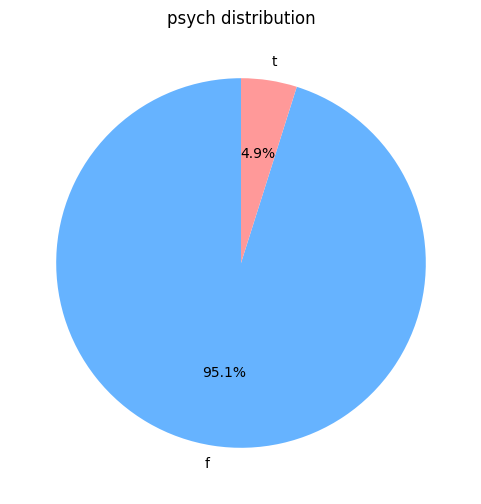

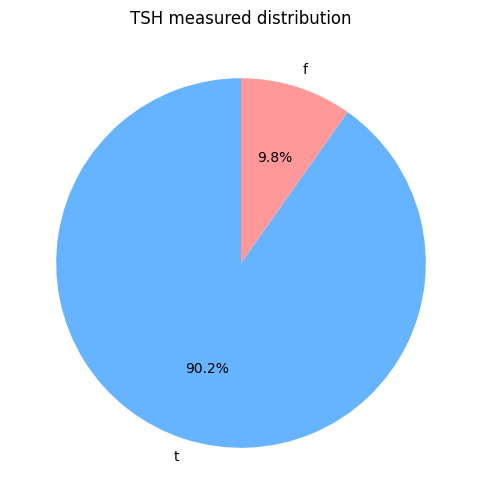

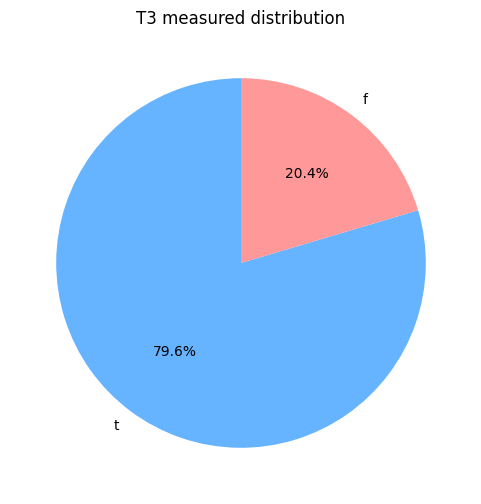

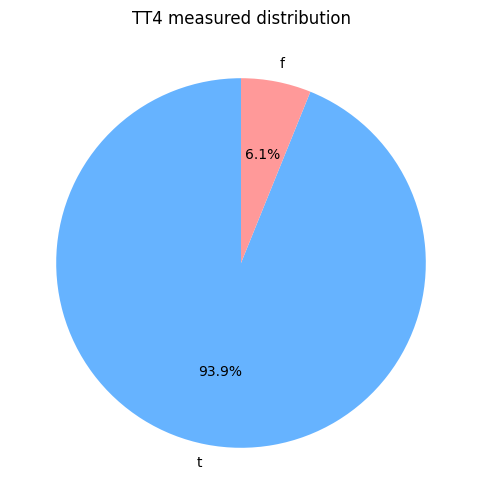

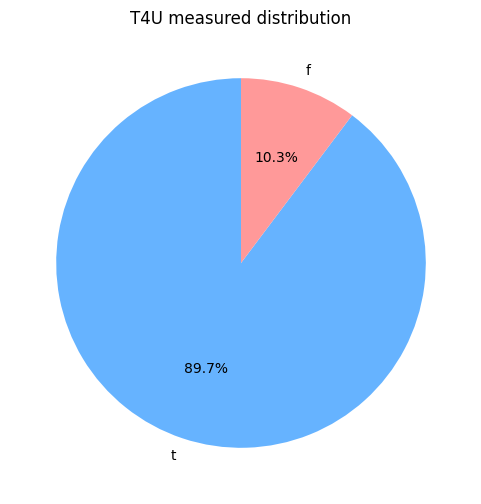

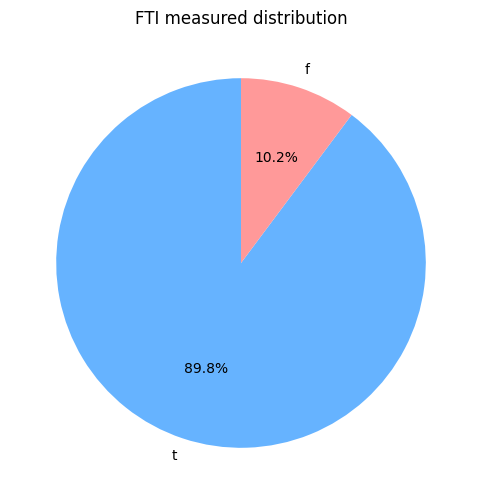

In [20]:
# checking piechart for all true false values
for column in df.columns:
    if len(df[column].unique())==2:
        pie_chart(column)

# Bi-Variate Analysis
Bivariate Analysis refers to the statistical analysis of exactly two variables to determine the empirical relationship between them. It is used to identify patterns, correlations, or associations.
| Type of Variables     | Technique      | Purpose       |
|----------------|----------------|----------------|
| Numerical vs. Numerical  | Scatter plot, Correlation coefficient (Pearson)  | Understand correlation or trend (positive, negative, none)  |
| Numerical vs. Categorical  | Box plot, Grouped bar chart, t-test, ANOVA  | Compare distribution across categories  |
| Categorical vs. Categorical  | Cross-tabulation, Stacked bar chart, Chi-square test	  | Identify association between categories  |


In [21]:
df.Classes.value_counts()

Classes
Negative           3608
Hypothyroidism      149
Hyperthyroidism      14
Name: count, dtype: int64

# Numeric Vs Numeric

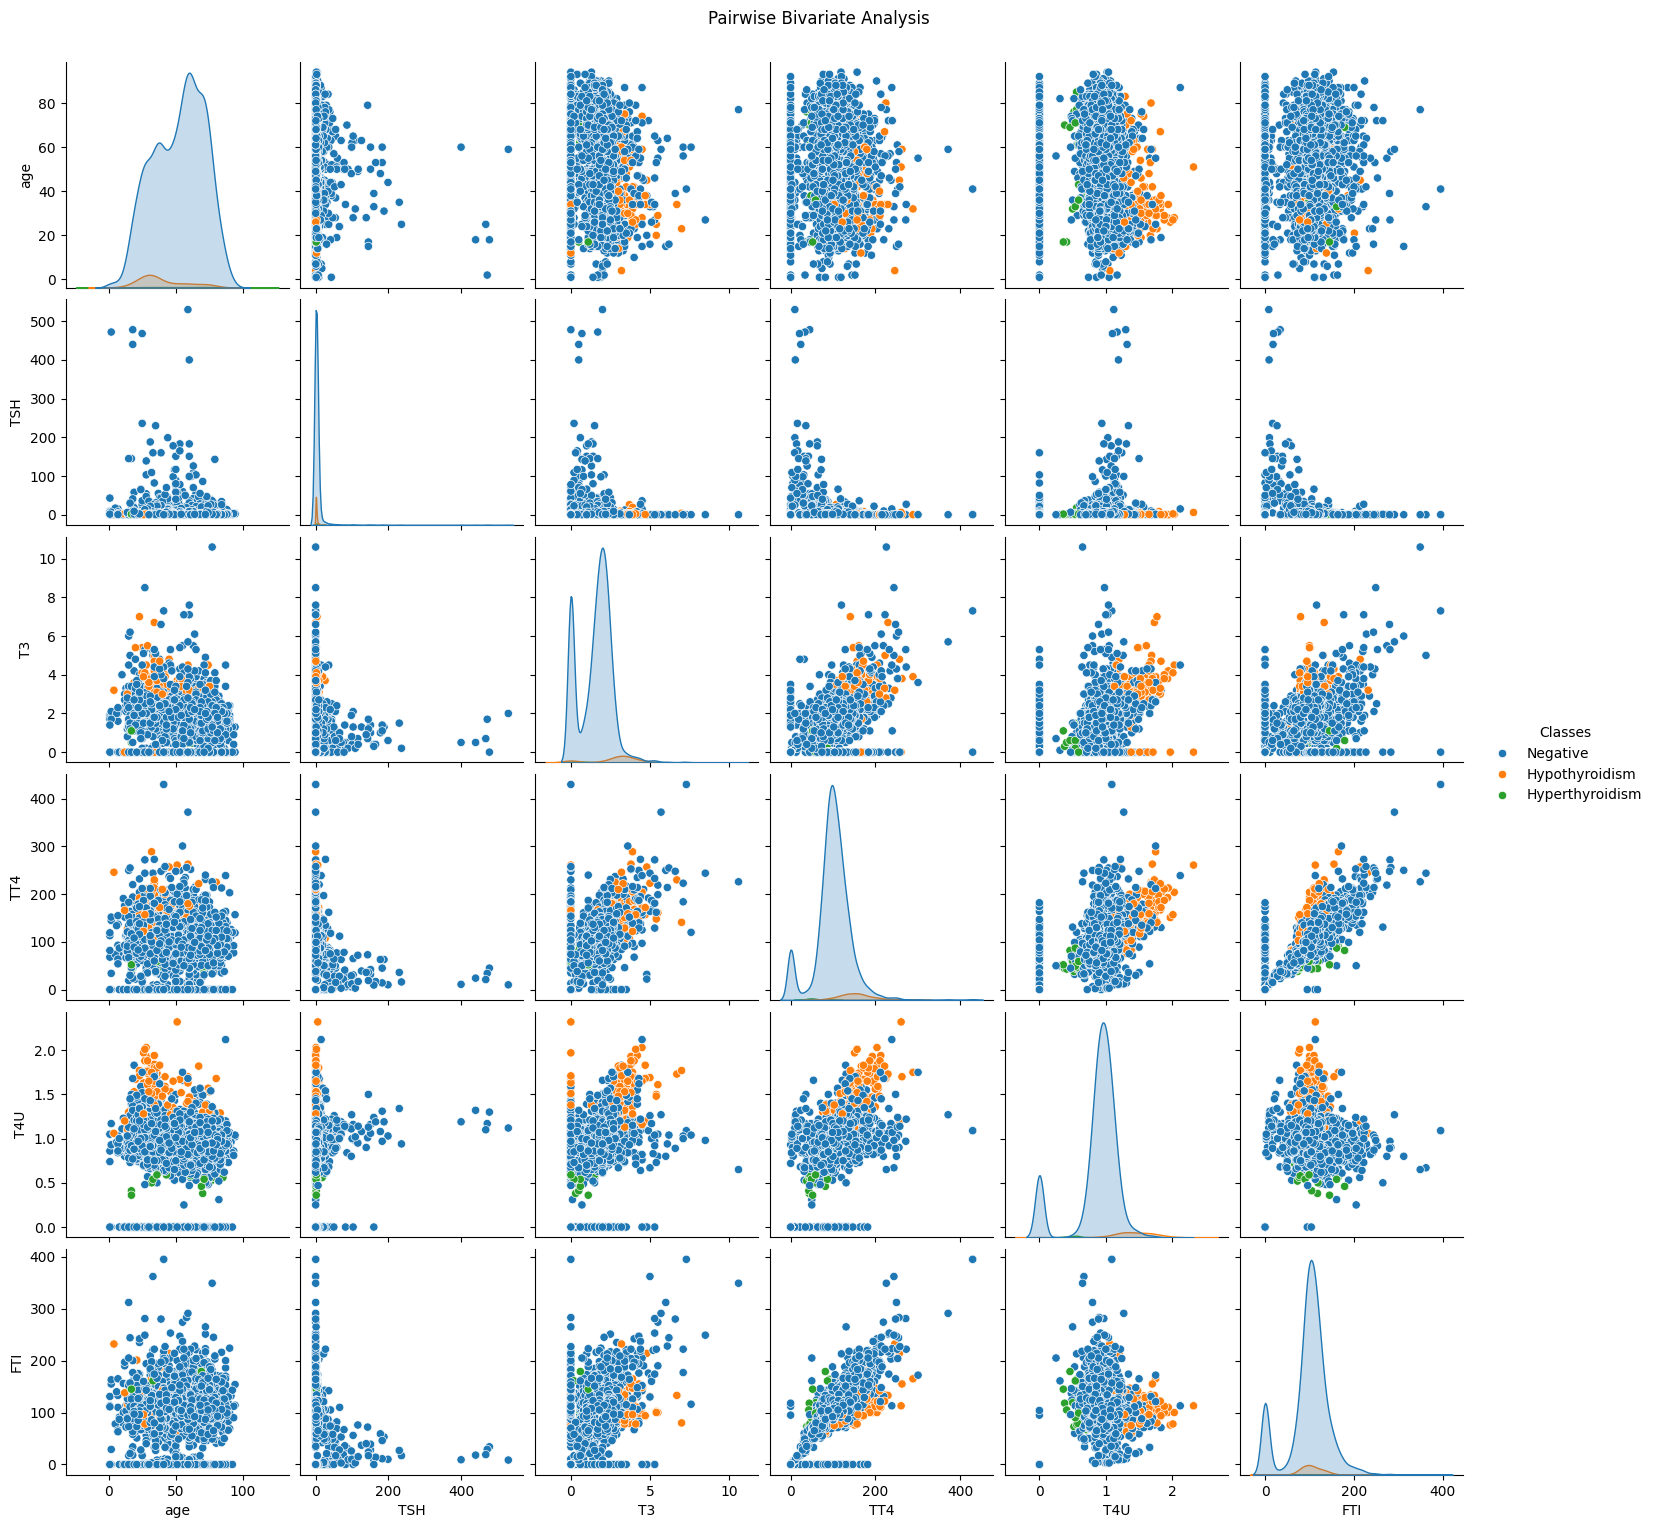

In [22]:
sns.pairplot(df,hue="Classes")
plt.suptitle("Pairwise Bivariate Analysis", y=1.02)
plt.show()

# Categorical Vs Numeric

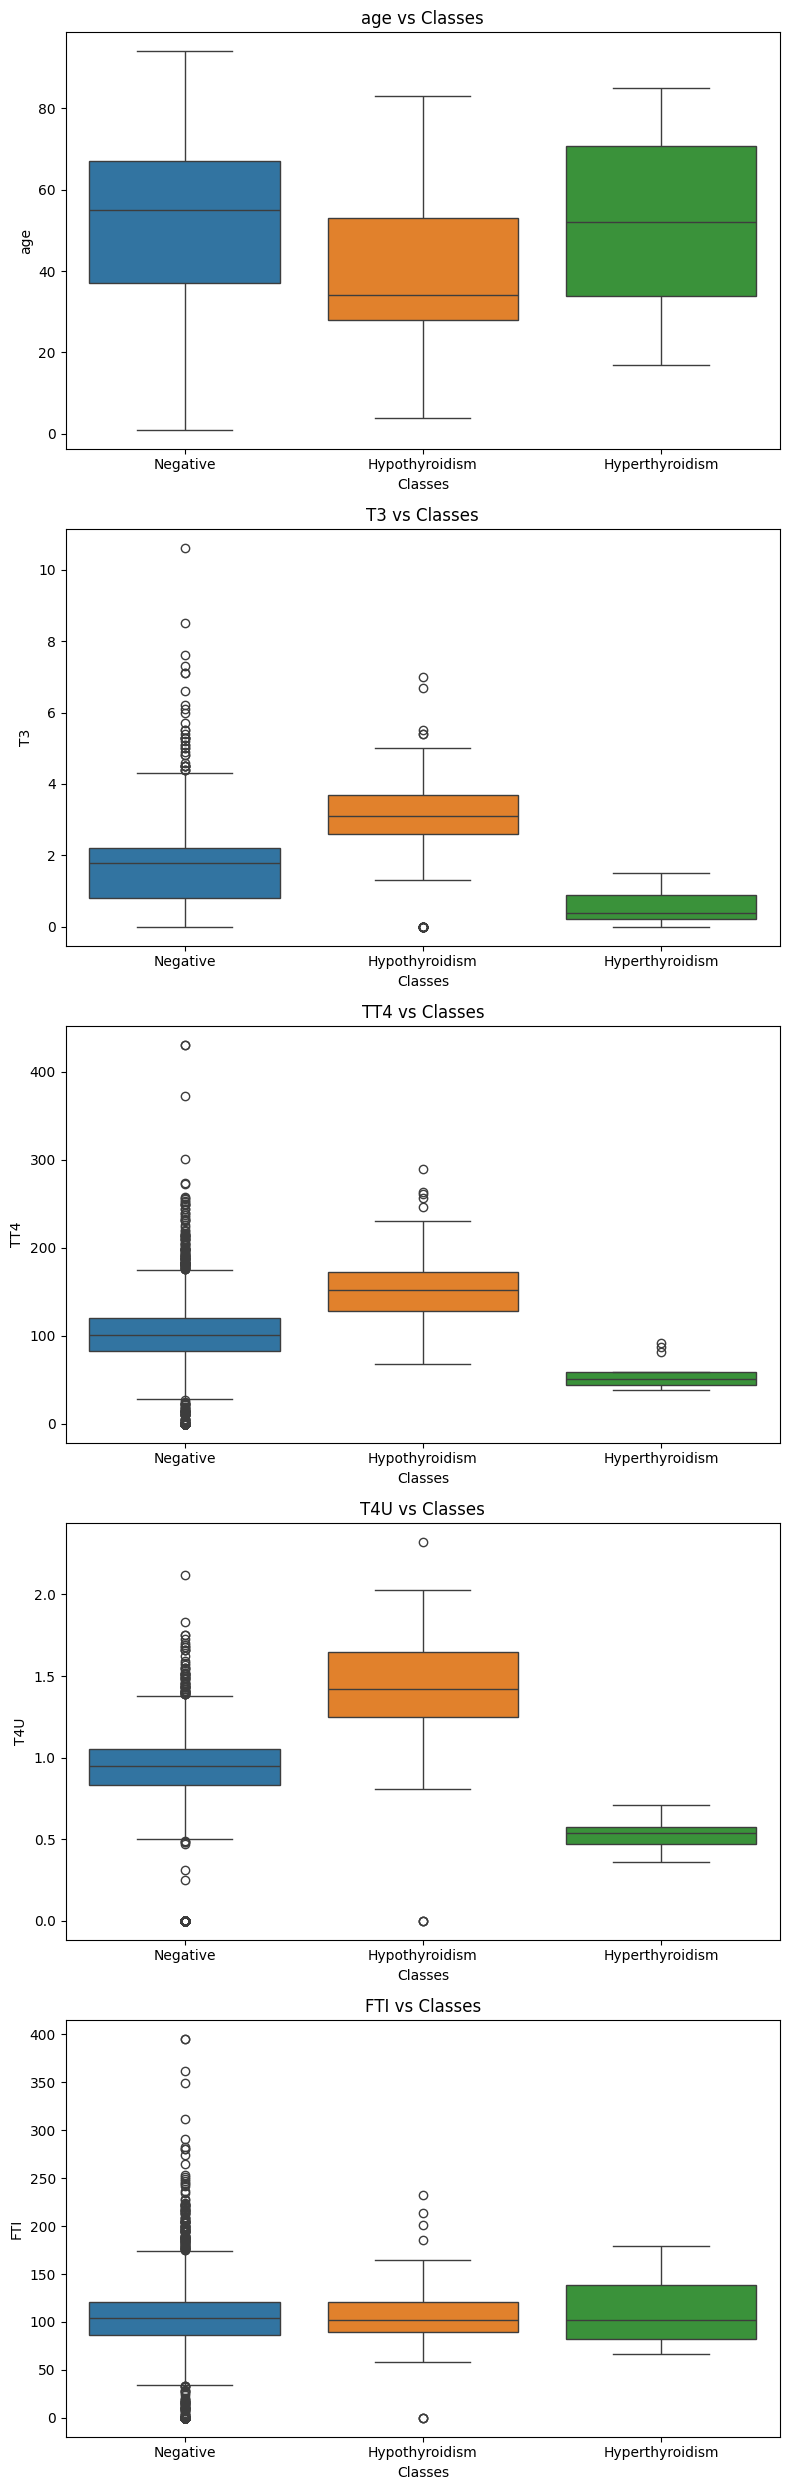

In [23]:
# Choose the categorical variable to compare against
category_col = "Classes"

# Identify all numerical columns
numerical_cols=['age','T3','TT4','T4U','FTI']

# Set up the plot grid
fig, axes = plt.subplots(nrows=len(numerical_cols), figsize=(8, 5 * len(numerical_cols)))

# Create a boxplot for each numerical column vs. the category
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=category_col, y=col, data=df, ax=axes[i],hue="Classes")
    axes[i].set_title(f'{col} vs {category_col}')

plt.tight_layout()
plt.show()
